                         id                                             name  \
0  62ecc47743eb9921f4be56b7        The troubled history of Jammu and Kashmir   
1  62e3bb3d4c48a5cdd5cd99c2          Patriots, Scientists. Forgotten Heroes!   
2  62e284e2c7afea30585166a4  India Inc- How India opened up to world economy   
3  62e0c0184e2beaeb406b861d                Profit Motive with Gaurav Rastogi   
4  62de399a2345d7d42ddb3114              Curtain Call with The Drama Library   

                                                text    label  segment_label  \
0  Hello and welcome to another edition of Open t...  history              0   
1  Namastkar Swagat Platform twitter Facebook Lin...  science              1   
2  So hello and welcome to another episode of Ind...  fiction              2   
3  So hello and welcome, everybody, to this editi...  history              3   
4  So hello and welcome everybody to Kulk. We are...    anime              4   

  sentiment  n_label  
0  negative    

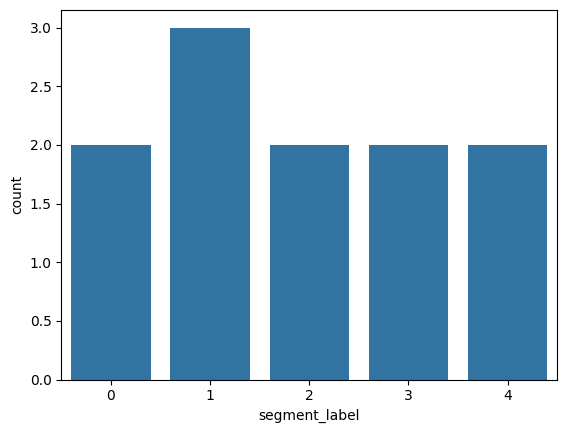

Accuracy: 0.2
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.20      1.00      0.33         1
           2       1.00      0.00      0.00         1
           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1

    accuracy                           0.20         5
   macro avg       0.84      0.20      0.07         5
weighted avg       0.84      0.20      0.07         5



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('data.csv')
# Check the structure of the dataset
print(data.head())
# Check for missing values
print(data.isnull().sum())
# Check the distribution of segment labels
label_counts = data['segment_label'].value_counts()
print(label_counts)
# Plot the distribution of segment labels
sns.countplot(x='segment_label', data=data)
plt.show()
# Remove classes with fewer than two samples
data = data[data['segment_label'].isin(label_counts[label_counts >= 2].index)]
# Features and target variable
X = data['text']
y = data['segment_label']
# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
# Ensure test_size is large enough to include all classes
test_size = max(0.2, len(data['segment_label'].unique()) / len(data))
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=test_size, random_state=42, stratify=y)
# Train the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
